In [1]:
import pandas as pd

In [47]:
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [9]:
x=df.drop('label',axis=1)

In [11]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...


In [12]:
y=df['label']

In [13]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
df.shape

(20800, 5)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [19]:
df=df.dropna()

In [20]:
df.shape

(18285, 5)

In [21]:
messages=df.copy()

In [22]:
messages.reset_index(inplace=True)

In [23]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [24]:
messages['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [25]:
import re

In [31]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [32]:
corpus[:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [34]:
y=messages['label']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [68]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [69]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [70]:
countdf=pd.DataFrame(x_train,columns=cv.get_feature_names())
countdf.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [73]:
from sklearn import metrics
import numpy as np
import itertools

In [76]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)

Accuracy: 0.901


Confusion matrix, without normalization


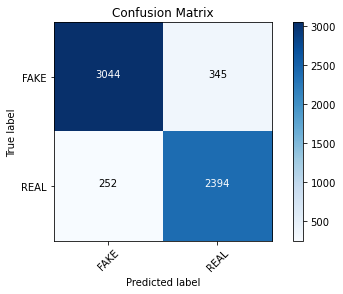

In [77]:
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [81]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy: 0.920
Confusion matrix, without normalization


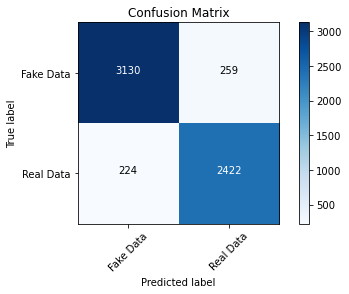

In [83]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score= metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f'%score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake Data','Real Data'])

In [84]:
classifier = MultinomialNB(alpha=0.1)

In [87]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [88]:
feature_names = cv.get_feature_names()

In [89]:
classifier.coef_[0]

array([ -9.10036605,  -8.6227385 ,  -9.10036605, ..., -10.79496178,
        -8.91464891,  -9.32862471])

In [90]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000126376264419, 'trump'),
 (-4.287849914102974, 'hillari'),
 (-4.396366840720952, 'clinton'),
 (-4.899946945868169, 'elect'),
 (-5.176575820557189, 'new'),
 (-5.2347075860082, 'comment'),
 (-5.273945400633064, 'video'),
 (-5.386793987777445, 'war'),
 (-5.396799073738407, 'us'),
 (-5.4119969346478385, 'hillari clinton'),
 (-5.417114653084819, 'fbi'),
 (-5.4806617042015136, 'vote'),
 (-5.566232695514838, 'email'),
 (-5.578216062401935, 'world'),
 (-5.633992599859346, 'obama'),
 (-5.734478675432337, 'donald'),
 (-5.763072474799078, 'donald trump'),
 (-5.785067496384624, 'russia'),
 (-5.846201884877992, 'day'),
 (-5.862087842466802, 'america')]

In [91]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.79496177525616, 'abe'),
 (-10.79496177525616, 'abroad'),
 (-10.79496177525616, 'abus new'),
 (-10.79496177525616, 'abus new york'),
 (-10.79496177525616, 'act new'),
 (-10.79496177525616, 'act new york'),
 (-10.79496177525616, 'advic'),
 (-10.79496177525616, 'advis new'),
 (-10.79496177525616, 'advis new york'),
 (-10.79496177525616, 'afford care'),
 (-10.79496177525616, 'afford care act'),
 (-10.79496177525616, 'age new'),
 (-10.79496177525616, 'age new york'),
 (-10.79496177525616, 'agenda breitbart'),
 (-10.79496177525616, 'ail'),
 (-10.79496177525616, 'airbag'),
 (-10.79496177525616, 'aleppo new'),
 (-10.79496177525616, 'aleppo new york'),
 (-10.79496177525616, 'ali'),
 (-10.79496177525616, 'america breitbart'),
 (-10.79496177525616, 'america new york'),
 (-10.79496177525616, 'ami'),
 (-10.79496177525616, 'ami schumer'),
 (-10.79496177525616, 'amp'),
 (-10.79496177525616, 'ann'),
 (-10.79496177525616, 'ann coulter'),
 (-10.79496177525616, 'announc new'),
 (-10.79496177525616,